<a href="https://colab.research.google.com/github/run-llama/llama_index/blob/main/docs/docs/examples/llm/gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gemini

**NOTE:** Gemini has largely been replaced by Google GenAI. Visit the [Google GenAI page](https://docs.llamaindex.ai/en/stable/examples/llm/google_genai/) for the latest examples and documentation.

In this notebook, we show how to use the Gemini text models from Google in LlamaIndex. Check out the [Gemini site](https://ai.google.dev/) or the [announcement](https://deepmind.google/technologies/gemini/).

If you're opening this Notebook on colab, you will need to install LlamaIndex 🦙 and the Gemini Python SDK.

In [1]:
%pip install -qU llama-index-llms-google-genai llama-index

## Basic Usage

You will need to get an API key from [Google AI Studio](https://makersuite.google.com/app/apikey). Once you have one, you can either pass it explicity to the model, or use the `GOOGLE_API_KEY` environment variable.

In [45]:
%env GOOGLE_API_KEY=

env: GOOGLE_API_KEY=


In [11]:
import os

GOOGLE_API_KEY = ""  # add your GOOGLE API key here
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [12]:
from llama_index.llms.google_genai import GoogleGenAI

llm = GoogleGenAI(
    model="models/gemini-1.5-flash",

    # api_key="some key",  # uses GOOGLE_API_KEY env var by default
)

#### Call `complete` with a prompt

In [13]:
from llama_index.llms.google_genai import GoogleGenAI

llm = GoogleGenAI(
    model="gemini-2.0-flash",
    # api_key="some key",  # uses GOOGLE_API_KEY env var by default
)

resp = llm.complete("Who is Paul Graham?")
print(resp)

Paul Graham is a prominent figure in the tech world, best known for his work as a programmer, essayist, and venture capitalist. Here's a breakdown of his key accomplishments and contributions:

*   **Programmer and Hacker:** Graham is a skilled programmer, particularly in Lisp. He co-founded Viaweb, a company that created one of the first web application platforms, which was later acquired by Yahoo! and became Yahoo! Store.

*   **Essayist:** He is a prolific and influential essayist, writing on topics ranging from programming and startups to art, philosophy, and social commentary. His essays are widely read and often spark debate within the tech community. You can find them on his website, paulgraham.com.

*   **Venture Capitalist:** Graham is a co-founder of Y Combinator (YC), a highly successful startup accelerator. YC has funded and mentored numerous well-known companies, including Airbnb, Dropbox, Reddit, Stripe, and many others. He played a key role in shaping YC's approach to ea

#### Call `chat` with a list of messages

In [14]:
from llama_index.core.llms import ChatMessage
from llama_index.llms.google_genai import GoogleGenAI

messages = [
    ChatMessage(
        role="system", content="You are a pirate with a colorful personality"
    ),
    ChatMessage(role="user", content="Tell me a story"),
]
llm = GoogleGenAI(model="gemini-2.0-flash")
resp = llm.chat(messages)

print(resp)

assistant: Ahoy there, matey! Cap'n Pegleg Pete at yer service! Don't let the name fool ya, I've got two perfectly good legs, thank ye very much. Just like the *sound* of "Pegleg Pete," see? Adds a bit o' flair, it does! Now, gather 'round, ye landlubbers, and I'll spin ye a yarn that'll curl yer toes and make yer grog taste sweeter!

This be the tale of the *Sea Serpent's Kiss*, the finest galleon to ever sail the seven seas, and how she almost ended up at the bottom of Davy Jones' locker thanks to a cursed parrot and a lovesick kraken.

It all started in Tortuga, that den of iniquity and rum-soaked dreams. We were celebrating a successful raid on a Spanish treasure fleet, the gold was flowin' like a river, and the music was loud enough to wake the dead. That's when I saw him – a parrot, green as emeralds and twice as loud as a banshee, perched on the shoulder of a one-eyed merchant with a shifty gaze.

"That bird," I said to me first mate, One-Eyed Jack (ironically, he had *two* eyes

## Streaming

Using `stream_complete` endpoint

In [15]:
from llama_index.llms.google_genai import GoogleGenAI

llm = GoogleGenAI(model="gemini-2.0-flash")

resp = llm.stream_complete("Who is Paul Graham?")
for r in resp:
    print(r.delta, end="")

Paul Graham is a prominent figure in the tech world, best known for his work as a programmer, essayist, and venture capitalist. Here's a breakdown of his key accomplishments and contributions:

*   **Programmer and Hacker:** He is a skilled programmer, particularly in Lisp. He co-founded Viaweb, one of the first software as a service (SaaS) companies, which was later acquired by Yahoo! and became Yahoo! Store.

*   **Essayist:** Graham is a prolific and influential essayist, writing on topics ranging from programming and startups to art, philosophy, and societal trends. His essays are known for their insightful observations, contrarian viewpoints, and clear writing style. They are widely read and discussed in the tech community.

*   **Venture Capitalist and Founder of Y Combinator:** Perhaps his most significant contribution is co-founding Y Combinator (YC) in 2005. YC is a highly successful startup accelerator that has funded and mentored numerous well-known companies, including Airb

Using `stream_chat` endpoint

In [16]:
from llama_index.core.llms import ChatMessage

messages = [
    ChatMessage(role="user", content="Who is Paul Graham?"),
]

resp = llm.stream_chat(messages)
for r in resp:
    print(r.delta, end="")

Paul Graham is a prominent figure in the tech world, best known for his work as a computer programmer, essayist, venture capitalist, and co-founder of the startup accelerator Y Combinator. Here's a breakdown of his key contributions:

*   **Computer Programmer:** Graham holds a Ph.D. in computer science from Harvard University, where he studied under the renowned AI researcher Robert Wilensky. He is known for his work on Lisp, a programming language, and for developing Viaweb, one of the first software-as-a-service (SaaS) companies, which was later acquired by Yahoo! and became Yahoo! Store.

*   **Essayist:** Graham is a prolific and influential essayist, writing on topics ranging from programming and startups to art, design, and philosophy. His essays are widely read and discussed in the tech community and beyond. Some of his most popular essays include "Hackers & Painters," "How to Start a Startup," and "Do Things That Don't Scale."

*   **Venture Capitalist:** Graham is a co-founde

## Asynchronous API

In [17]:
from llama_index.llms.google_genai import GoogleGenAI
import asyncio

llm = GoogleGenAI(model="gemini-2.0-flash")

resp = await llm.astream_complete("Who is Paul Graham?")
async for r in resp:
    print(r.delta, end="")

Paul Graham is a prominent figure in the tech world, best known for his work as a programmer, essayist, and venture capitalist. Here's a breakdown of his key contributions:

*   **Programmer and Hacker:** He is a skilled programmer, particularly in Lisp. He co-founded Viaweb, a company that created software for building online stores, which was later acquired by Yahoo! and became Yahoo! Store.

*   **Essayist:** Graham is a prolific and influential essayist, writing on topics ranging from programming and startups to art, philosophy, and social commentary. His essays are known for their insightful observations, clear writing style, and often contrarian viewpoints. They are widely read and discussed in the tech community.

*   **Venture Capitalist:** He co-founded Y Combinator (YC) in 2005, a highly successful startup accelerator that has funded many well-known companies, including Airbnb, Dropbox, Reddit, Stripe, and many others. YC provides seed funding, mentorship, and networking oppo

In [18]:
messages = [
    ChatMessage(role="user", content="Who is Paul Graham?"),
]

resp = await llm.achat(messages)
print(resp)

assistant: Paul Graham is a prominent figure in the tech world, best known for his work as a programmer, essayist, and venture capitalist. Here's a breakdown of his key accomplishments and roles:

*   **Programmer and Hacker:** He is a skilled programmer, particularly in Lisp. He co-founded Viaweb, a company that created software for building online stores, which was later acquired by Yahoo! and became Yahoo! Store.

*   **Essayist:** Graham is a prolific and influential essayist, writing on topics ranging from programming and startups to art, design, and societal trends. His essays are known for their insightful observations, clear writing style, and often contrarian viewpoints. They are widely read and discussed in the tech community.

*   **Venture Capitalist:** He co-founded Y Combinator (YC) in 2005, a highly successful startup accelerator. YC provides seed funding, mentorship, and networking opportunities to early-stage startups. It has funded many well-known companies, including


# Vertex AI Support

By providing the region and project_id parameters (either through environment variables or directly), you can enable usage through Vertex AI.



In [ ]:
# Set environment variables
!export GOOGLE_GENAI_USE_VERTEXAI=true
!export GOOGLE_CLOUD_PROJECT='your-project-id'
!export GOOGLE_CLOUD_LOCATION='us-central1'

In [ ]:
from llama_index.llms.google_genai import GoogleGenAI

# or set the parameters directly
llm = GoogleGenAI(
    model="gemini-2.0-flash",
    vertexai_config={"project": "your-project-id", "location": "us-central1"},
    # you should set the context window to the max input tokens for the model
    context_window=200000,
    max_tokens=512,
)

#Multi-Modal Support

Using ChatMessage objects, you can pass in images and text to the LLM.

In [ ]:
!wget https://cdn.pixabay.com/photo/2021/12/12/20/00/play-6865967_640.jpg -O image.jpg

In [20]:
from llama_index.core.llms import ChatMessage, TextBlock, ImageBlock
from llama_index.llms.google_genai import GoogleGenAI

llm = GoogleGenAI(model="gemini-2.0-flash")

messages = [
    ChatMessage(
        role="user",
        blocks=[
            ImageBlock(path="image.jpg"),
            TextBlock(text="What is in this image?"),
        ],
    )
]

resp = llm.chat(messages)
print(resp)

assistant: The image contains four wooden dice with black dots on a dark gray surface. Each die shows a different number of dots, indicating different values.



# Structured Prediction

LlamaIndex provides an intuitive interface for converting any LLM into a structured LLM through structured_predict - simply define the target Pydantic class (can be nested), and given a prompt, we extract out the desired object.

In [21]:
from llama_index.llms.google_genai import GoogleGenAI
from llama_index.core.prompts import PromptTemplate
from llama_index.core.bridge.pydantic import BaseModel
from typing import List


class MenuItem(BaseModel):
    """A menu item in a restaurant."""

    course_name: str
    is_vegetarian: bool


class Restaurant(BaseModel):
    """A restaurant with name, city, and cuisine."""

    name: str
    city: str
    cuisine: str
    menu_items: List[MenuItem]


llm = GoogleGenAI(model="gemini-2.0-flash")
prompt_tmpl = PromptTemplate(
    "Generate a restaurant in a given city {city_name}"
)

# Option 1: Use `as_structured_llm`
restaurant_obj = (
    llm.as_structured_llm(Restaurant)
    .complete(prompt_tmpl.format(city_name="Miami"))
    .raw
)
# Option 2: Use `structured_predict`
# restaurant_obj = llm.structured_predict(Restaurant, prompt_tmpl, city_name="Miami")



In [22]:
print(restaurant_obj)


name='Miami Spice' city='Miami' cuisine='Floribbean' menu_items=[MenuItem(course_name='ceviche', is_vegetarian=False)]



# Structured Prediction with Streaming

Any LLM wrapped with as_structured_llm supports streaming through stream_chat

In [23]:
from llama_index.core.llms import ChatMessage
from IPython.display import clear_output
from pprint import pprint

input_msg = ChatMessage.from_str("Generate a restaurant in San Francisco")

sllm = llm.as_structured_llm(Restaurant)
stream_output = sllm.stream_chat([input_msg])
for partial_output in stream_output:
    clear_output(wait=True)
    pprint(partial_output.raw.dict())
    restaurant_obj = partial_output.raw

restaurant_obj

{'city': 'San Francisco',
 'cuisine': 'Italian',
 'menu_items': [{'course_name': 'Pasta', 'is_vegetarian': False}],
 'name': 'My Restaurant'}


<ipython-input-23-c29dd0049e8b>:11: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  pprint(partial_output.raw.dict())


Restaurant(name='My Restaurant', city='San Francisco', cuisine='Italian', menu_items=[MenuItem(course_name='Pasta', is_vegetarian=False)])


# Tool/Function Calling

Google GenAI supports direct tool/function calling through the API. Using LlamaIndex, we can implement some core agentic tool calling patterns.

In [24]:
from llama_index.core.tools import FunctionTool
from llama_index.core.llms import ChatMessage
from llama_index.llms.google_genai import GoogleGenAI
from datetime import datetime

llm = GoogleGenAI(model="gemini-2.0-flash")


def get_current_time(timezone: str) -> dict:
    """Get the current time"""
    return {
        "time": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "timezone": timezone,
    }


# uses the tool name, any type annotations, and docstring to describe the tool
tool = FunctionTool.from_defaults(fn=get_current_time)


We can simply do a single pass to call the tool and get the result:

In [25]:
resp = llm.predict_and_call([tool], "What is the current time in New York?")
print(resp)

{'time': '2025-04-08 14:41:03', 'timezone': 'America/New_York'}



We can also use lower-level APIs to implement an agentic tool-calling loop!

In [26]:
chat_history = [
    ChatMessage(role="user", content="What is the current time in New York?")
]
tools_by_name = {t.metadata.name: t for t in [tool]}

resp = llm.chat_with_tools([tool], chat_history=chat_history)
tool_calls = llm.get_tool_calls_from_response(
    resp, error_on_no_tool_call=False
)

if not tool_calls:
    print(resp)
else:
    while tool_calls:
        # add the LLM's response to the chat history
        chat_history.append(resp.message)

        for tool_call in tool_calls:
            tool_name = tool_call.tool_name
            tool_kwargs = tool_call.tool_kwargs

            print(f"Calling {tool_name} with {tool_kwargs}")
            tool_output = tool.call(**tool_kwargs)
            print("Tool output: ", tool_output)
            chat_history.append(
                ChatMessage(
                    role="tool",
                    content=str(tool_output),
                    # most LLMs like Gemini, Anthropic, OpenAI, etc. need to know the tool call id
                    additional_kwargs={"tool_call_id": tool_call.tool_id},
                )
            )

            resp = llm.chat_with_tools([tool], chat_history=chat_history)
            tool_calls = llm.get_tool_calls_from_response(
                resp, error_on_no_tool_call=False
            )
    print("Final response: ", resp.message.content)

Calling get_current_time with {'timezone': 'America/New_York'}
Tool output:  {'time': '2025-04-08 14:41:04', 'timezone': 'America/New_York'}
Final response:  The current time in New York is 2025-04-08 14:41:04.




# Image Generation

Select models also support image outputs, as well as image inputs. Using the response_modalities config, we can generate and edit images with a Gemini model!

In [39]:
from llama_index.llms.google_genai import GoogleGenAI
import google.genai.types as types

config = types.GenerateContentConfig(
    temperature=0.1, response_modalities=["Text", "Image"]
)

llm = GoogleGenAI(
    model="models/gemini-2.0-flash-exp", generation_config=config
)

In [42]:
from llama_index.core.llms import ChatMessage, TextBlock, ImageBlock

messages = [
    ChatMessage(role="user", content="Please generate an image of a cute dog")
]

resp = llm.chat(messages)

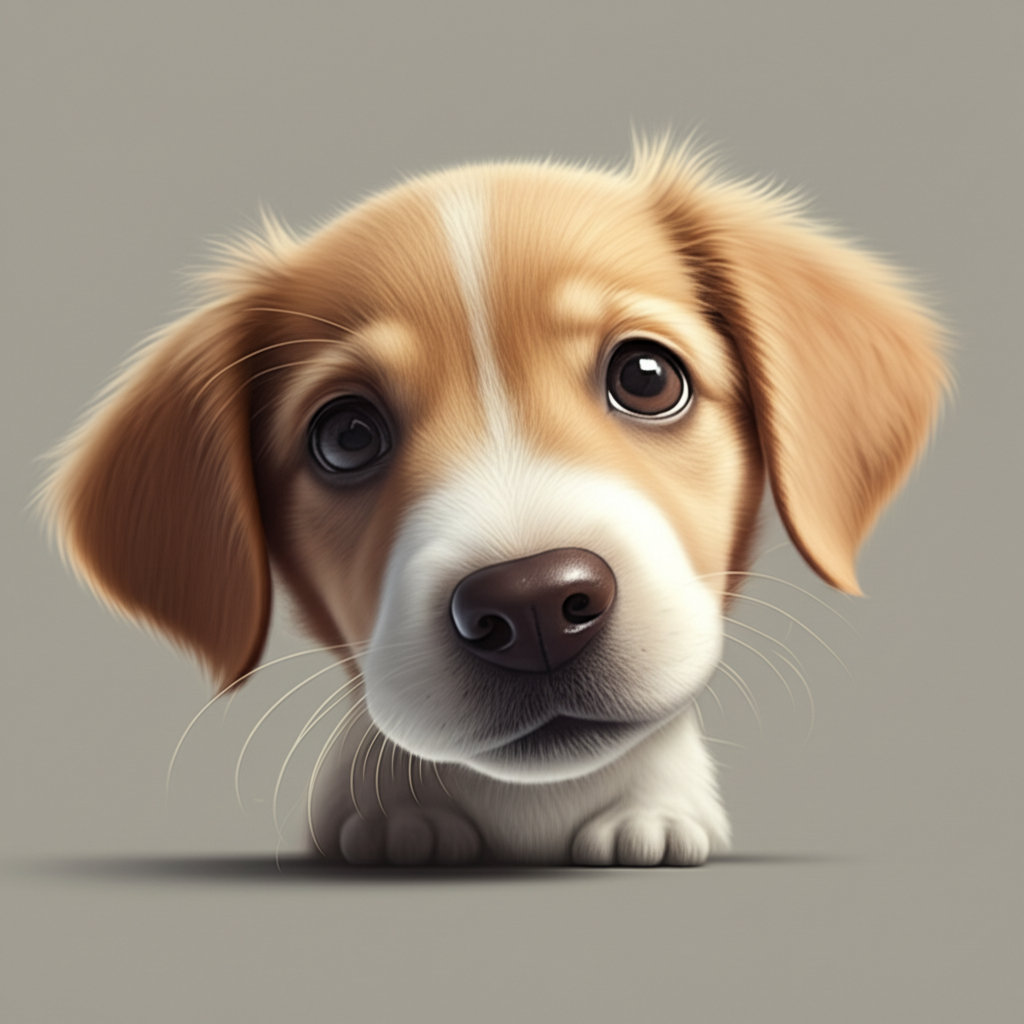

In [41]:
from PIL import Image
from IPython.display import display

for block in resp.message.blocks:
    if isinstance(block, ImageBlock):
        image = Image.open(block.resolve_image())
        display(image)
    elif isinstance(block, TextBlock):
        print(block.text)


We can also edit the image!

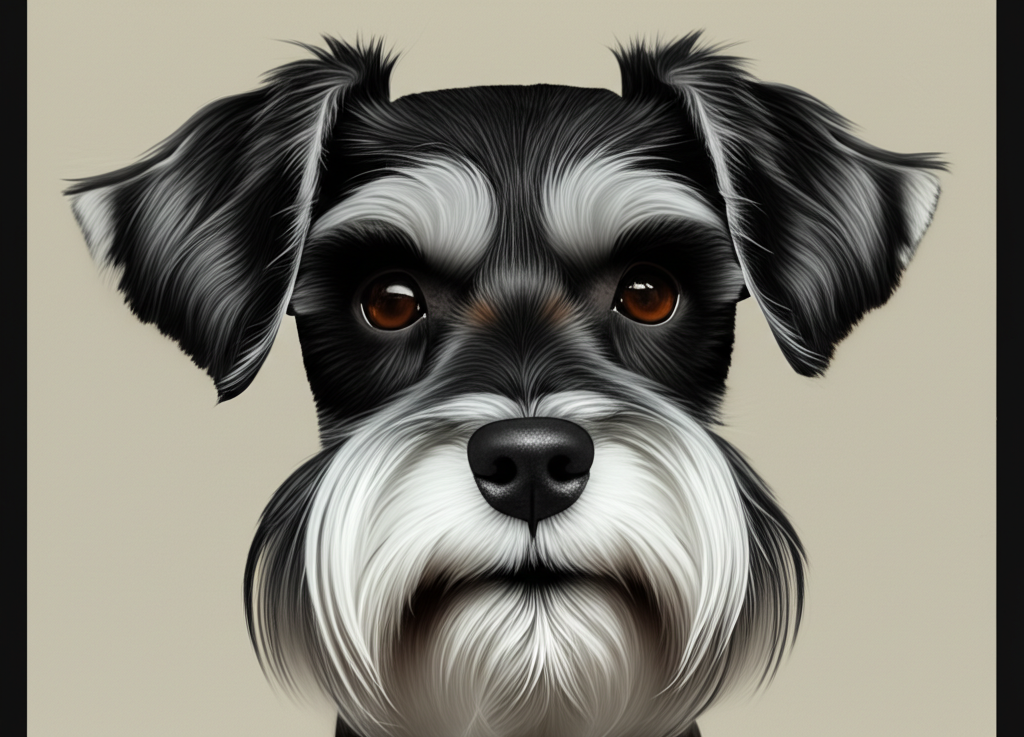

In [44]:
messages.append(resp.message)
messages.append(
    ChatMessage(
        role="user",
        content="Please edit the image to make the dog a mini-schnauzer, but keep the same overall pose, framing, background, and art style.",
    )
)

resp = llm.chat(messages)

for block in resp.message.blocks:
    if isinstance(block, ImageBlock):
        image = Image.open(block.resolve_image())
        display(image)
    elif isinstance(block, TextBlock):
        print(block.text)